# 0.Import Libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid')

import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/students-data-ucla/Student_Admissions.ipynb
/kaggle/input/students-data-ucla/README.md
/kaggle/input/students-data-ucla/student_data.csv
/kaggle/input/students-data-ucla/_config.yml
/kaggle/input/students-data-ucla/examples/data.png
/kaggle/input/students-data-ucla/examples/summary.png
/kaggle/input/students-data-ucla/examples/student-acceptance.png
/kaggle/input/students-data-ucla/examples/all-ranks.png


# 1.Load Dataset

In [3]:
dataset = pd.read_csv('/kaggle/input/students-data-ucla/student_data.csv')

In [4]:
dataset.head()

,admit,gre,gpa,rank
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


# 2.Data Analysis

In [5]:
dataset.shape

(400, 4)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   400 non-null    int64  
 1   gre     398 non-null    float64
 2   gpa     398 non-null    float64
 3   rank    399 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 12.6 KB


In [7]:
dataset.describe()

,admit,gre,gpa,rank
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


In [8]:
dataset['rank'].value_counts()

rank
2.0    150
3.0    121
4.0     67
1.0     61
Name: count, dtype: int64

In [9]:
dataset['admit'].value_counts()

admit
0    273
1    127
Name: count, dtype: int64

# 3.Data Visualize

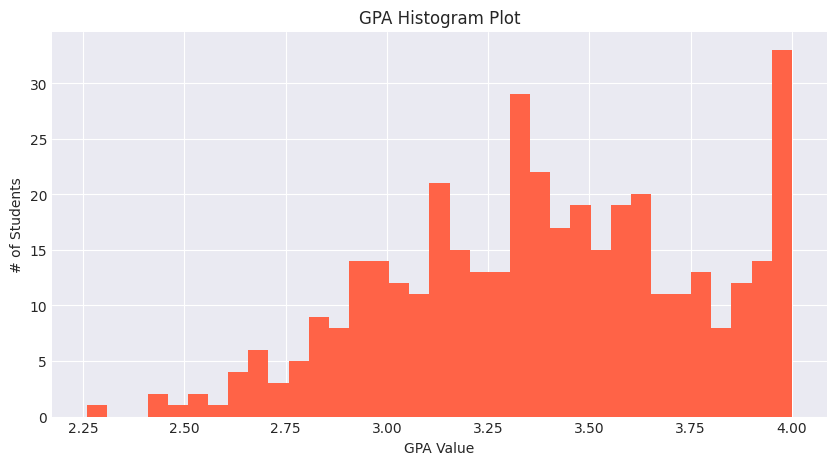

In [10]:
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(dataset['gpa'],bins=35,color='tomato')
ax.set_title('GPA Histogram Plot')
ax.set_xlabel('GPA Value')
ax.set_ylabel('# of Students')
plt.show()

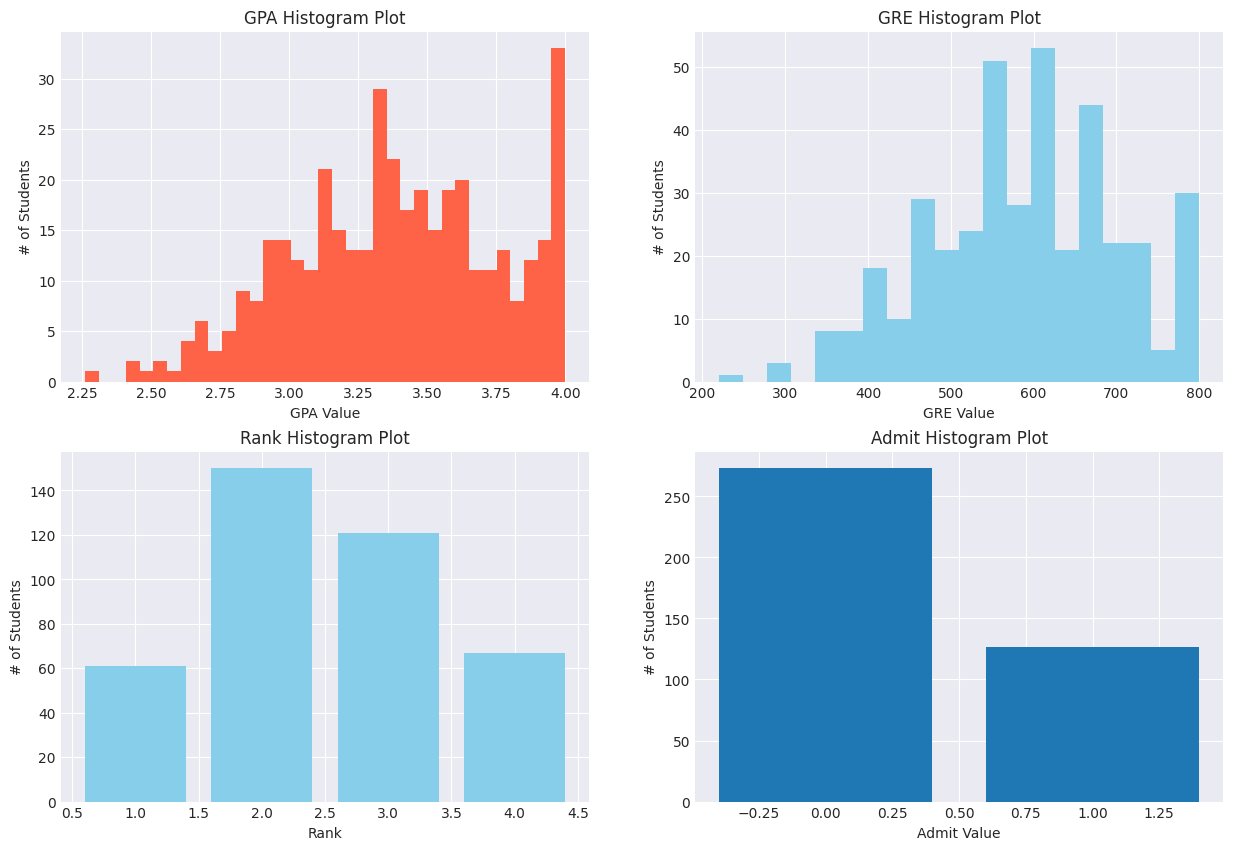

In [11]:
fig, ((ax0,ax1),(ax2,ax3)) = plt.subplots(ncols=2,
                                          nrows=2,
                                          figsize=(15,10))

#  gpa
ax0.hist(dataset['gpa'],bins=35,color='tomato')
ax0.set_title('GPA Histogram Plot')
ax0.set_xlabel('GPA Value')
ax0.set_ylabel('# of Students')

# gre 
ax1.hist(dataset['gre'],bins=20,color='skyblue')
ax1.set_title('GRE Histogram Plot')
ax1.set_xlabel('GRE Value')
ax1.set_ylabel('# of Students')

# gre 
ax2.bar(x = dataset['rank'].value_counts().keys(),
        height = dataset['rank'].value_counts().values,
        color ='skyblue')
ax2.set_title('Rank Histogram Plot')
ax2.set_xlabel('Rank')
ax2.set_ylabel('# of Students')

# gre 
ax3.bar(x = dataset['admit'].value_counts().keys(),
        height = dataset['admit'].value_counts().values)
ax3.set_title('Admit Histogram Plot')
ax3.set_xlabel('Admit Value')
ax3.set_ylabel('# of Students')



fig.show()

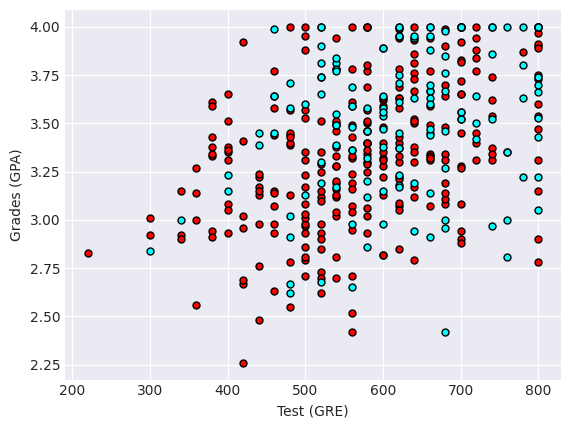

In [12]:
# Function to help us plot
def plot_points(data):
    X = np.array(data[["gre","gpa"]])
    y = np.array(data["admit"])
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'cyan', edgecolor = 'k')
    plt.xlabel('Test (GRE)')
    plt.ylabel('Grades (GPA)')
    
# Plotting the points
plot_points(dataset)
plt.show()

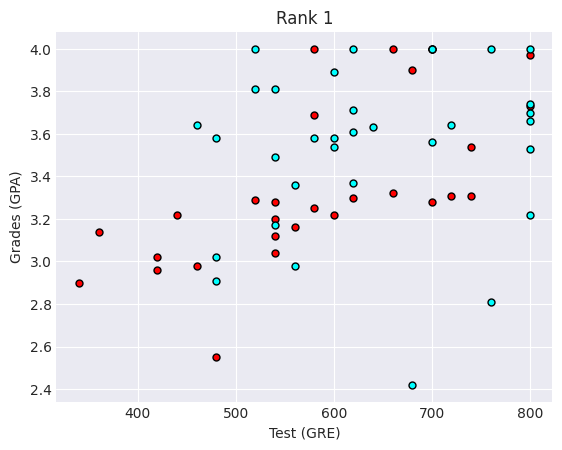

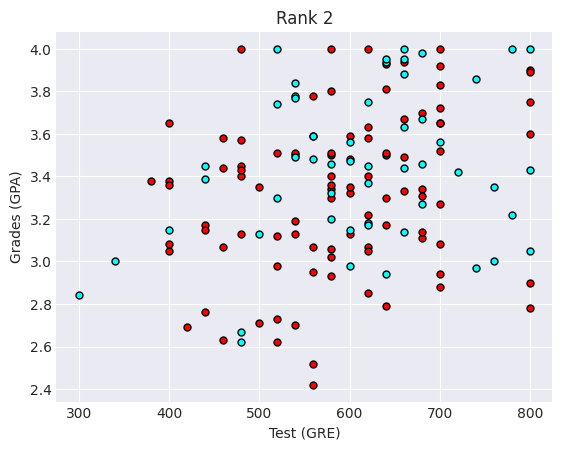

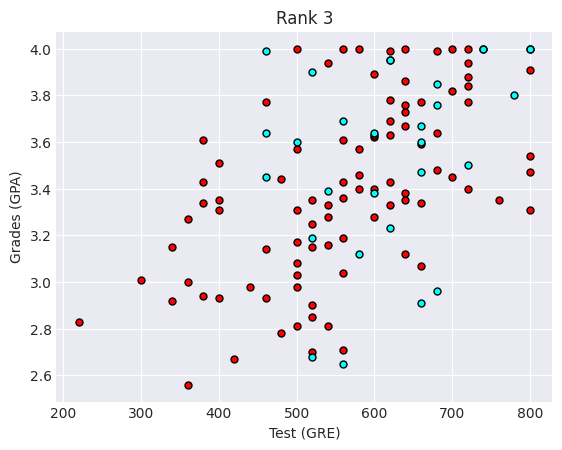

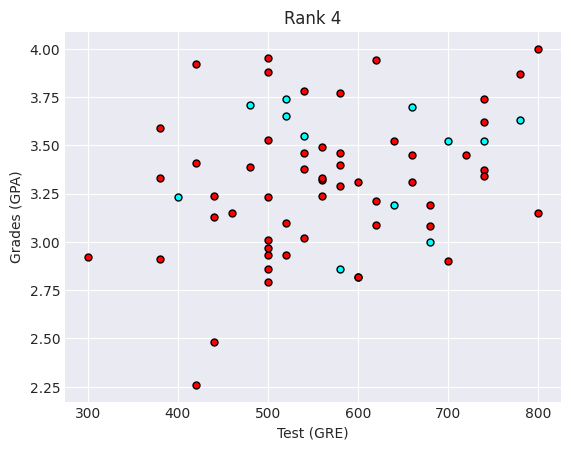

In [13]:
# Separating the ranks
data_rank1 = dataset[dataset["rank"]==1]
data_rank2 = dataset[dataset["rank"]==2]
data_rank3 = dataset[dataset["rank"]==3]
data_rank4 = dataset[dataset["rank"]==4]

# Plotting the graphs
plot_points(data_rank1)
plt.title("Rank 1")
plt.show()
plot_points(data_rank2)
plt.title("Rank 2")
plt.show()
plot_points(data_rank3)
plt.title("Rank 3")
plt.show()
plot_points(data_rank4)
plt.title("Rank 4")
plt.show()

# 4.Data Preprocess
## 4.1 One-Hot Encoding

In [32]:
dataset = dataset.dropna()
dataset

,admit,gre,gpa,rank
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
...,...,...,...,...
395,0,620.0,4.00,2.0
396,0,560.0,3.04,3.0
397,0,460.0,2.63,2.0
398,0,700.0,3.65,2.0


In [33]:
# Make dummy variables for rank
one_hot_data = pd.concat([dataset, pd.get_dummies(dataset['rank'], prefix='rank',dtype='float')], axis=1)

# Drop the previous rank column
one_hot_data = one_hot_data.drop('rank', axis=1)

# Print the first 10 rows of our data
one_hot_data[:10]

,admit,gre,gpa,rank_1.0,rank_2.0,rank_3.0,rank_4.0
0,0,380.0,3.61,0.0,0.0,1.0,0.0
1,1,660.0,3.67,0.0,0.0,1.0,0.0
2,1,800.0,4.00,1.0,0.0,0.0,0.0
3,1,640.0,3.19,0.0,0.0,0.0,1.0
4,0,520.0,2.93,0.0,0.0,0.0,1.0
5,1,760.0,3.00,0.0,1.0,0.0,0.0
6,1,560.0,2.98,1.0,0.0,0.0,0.0
7,0,400.0,3.08,0.0,1.0,0.0,0.0
8,1,540.0,3.39,0.0,0.0,1.0,0.0
9,0,700.0,3.92,0.0,1.0,0.0,0.0


# 4.2 Scaling

In [34]:
# Making a copy of our data
processed_data = one_hot_data[:]

# TODO: Scale the columns
processed_data["gre"]=processed_data["gre"]/800
processed_data["gpa"]=processed_data["gpa"]/4.0

# Printing the first 10 rows of our procesed data
processed_data[:10]

,admit,gre,gpa,rank_1.0,rank_2.0,rank_3.0,rank_4.0
0,0,0.475,0.9025,0.0,0.0,1.0,0.0
1,1,0.825,0.9175,0.0,0.0,1.0,0.0
2,1,1.000,1.0000,1.0,0.0,0.0,0.0
3,1,0.800,0.7975,0.0,0.0,0.0,1.0
4,0,0.650,0.7325,0.0,0.0,0.0,1.0
5,1,0.950,0.7500,0.0,1.0,0.0,0.0
6,1,0.700,0.7450,1.0,0.0,0.0,0.0
7,0,0.500,0.7700,0.0,1.0,0.0,0.0
8,1,0.675,0.8475,0.0,0.0,1.0,0.0
9,0,0.875,0.9800,0.0,1.0,0.0,0.0


## 4.3 Train test split

In [36]:
sample = np.random.choice(processed_data.index, size=int(len(processed_data)*0.9), replace=False)
train_data, test_data = processed_data.loc[sample], processed_data.drop(sample)

print("Number of training samples is", len(train_data))
print("Number of testing samples is", len(test_data))
print(train_data[:10])
print(test_data[:10])

Number of training samples is 357
Number of testing samples is 40
     admit    gre     gpa  rank_1.0  rank_2.0  rank_3.0  rank_4.0
205      1  0.975  0.9500       0.0       0.0       1.0       0.0
222      1  0.600  0.7550       1.0       0.0       0.0       0.0
101      0  0.725  0.8925       0.0       0.0       1.0       0.0
70       0  0.800  1.0000       0.0       0.0       1.0       0.0
365      0  0.600  0.6950       0.0       0.0       1.0       0.0
278      1  0.850  0.7500       0.0       0.0       0.0       1.0
44       0  0.875  0.7350       0.0       1.0       0.0       0.0
336      0  0.650  0.7875       0.0       0.0       1.0       0.0
113      0  0.750  0.8050       1.0       0.0       0.0       0.0
273      0  0.825  0.8300       1.0       0.0       0.0       0.0
    admit    gre     gpa  rank_1.0  rank_2.0  rank_3.0  rank_4.0
0       0  0.475  0.9025       0.0       0.0       1.0       0.0
4       0  0.650  0.7325       0.0       0.0       0.0       1.0
7       0  0.

## 4.4 Splitting data into features and labels

In [37]:
features = train_data.drop('admit', axis=1)
targets = train_data['admit']
features_test = test_data.drop('admit', axis=1)
targets_test = test_data['admit']

print(features[:10])
print(targets[:10])

       gre     gpa  rank_1.0  rank_2.0  rank_3.0  rank_4.0
205  0.975  0.9500       0.0       0.0       1.0       0.0
222  0.600  0.7550       1.0       0.0       0.0       0.0
101  0.725  0.8925       0.0       0.0       1.0       0.0
70   0.800  1.0000       0.0       0.0       1.0       0.0
365  0.600  0.6950       0.0       0.0       1.0       0.0
278  0.850  0.7500       0.0       0.0       0.0       1.0
44   0.875  0.7350       0.0       1.0       0.0       0.0
336  0.650  0.7875       0.0       0.0       1.0       0.0
113  0.750  0.8050       1.0       0.0       0.0       0.0
273  0.825  0.8300       1.0       0.0       0.0       0.0
205    1
222    1
101    0
70     0
365    0
278    1
44     0
336    0
113    0
273    0
Name: admit, dtype: int64


# 5.Creating Neural Network
# 5.1 Create Helper Functions

In [38]:
# Activation (sigmoid) function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_prime(x):
    return sigmoid(x) * (1-sigmoid(x))

def error_formula(y, output):
    return - y*np.log(output) - (1 - y) * np.log(1-output)

# TODO: Write the error term formula
def error_term_formula(x, y, output):
    return (y-output)*sigmoid_prime(x)

## 5.2 Create Train Function

In [44]:
# Training function
def train_nn(features, targets, epochs=1000, learnrate=0.5):
    
    # Use to same seed to make debugging easier
    np.random.seed(42)

    n_records, n_features = features.shape
    last_loss = None

    # Initialize weights
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    
    for e in range(epochs):
        
        del_w = np.zeros(weights.shape)
        
        for x, y in zip(features.values, targets):
            # Loop through all records, x is the input, y is the target

            # Activation of the output unit
            #   Notice we multiply the inputs and the weights here 
            #   rather than storing h as a separate variable 
            output = sigmoid(np.dot(x, weights))
            

            # The error, the target minus the network output
            error = error_formula(y, output)

            # The error term
            error_term = error_term_formula(x, y, output)
            

            # The gradient descent step, the error times the gradient times the inputs
            del_w += error_term * x

        # Update the weights here. The learning rate times the 
        # change in weights, divided by the number of records to average
        weights += learnrate * del_w / n_records

        # Printing out the mean square error on the training set
        if e % (epochs / 10) == 0:
            out = sigmoid(np.dot(features, weights))
            loss = np.mean((out - targets) ** 2)
            
            print("Epoch:", e)
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            print("=========")
    print("Finished training!")
    return weights

In [62]:
weights = train_nn(features, targets, epochs=1000, learnrate=0.5)

Epoch: 0
Train loss:  0.27618252887110367
Epoch: 100
Train loss:  0.20079430121405858
Epoch: 200
Train loss:  0.19860140605244048
Epoch: 300
Train loss:  0.197508618808007
Epoch: 400
Train loss:  0.1969484924040901
Epoch: 500
Train loss:  0.196640531560639
Epoch: 600
Train loss:  0.19645232201526427
Epoch: 700
Train loss:  0.1963219494435684
Epoch: 800
Train loss:  0.1962202261129556
Epoch: 900
Train loss:  0.19613320807735313
Finished training!


# 6.Test Dataset Accuracy

In [63]:
# Calculate accuracy on test data
test_out = sigmoid(np.dot(features_test, weights))
predictions = test_out > 0.5
accuracy = np.mean(predictions == targets_test)
print("Prediction accuracy: {:.3f}".format(accuracy))

Prediction accuracy: 0.525
